In [ ]:
#TASK_1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
data = pd.read_csv('/content/Dataset .csv')

# Drop irrelevant columns
irrelevant_columns = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality Verbose']
data.drop(columns=irrelevant_columns, inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Country Code', 'City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features and target variable
X = data.drop(columns='Aggregate rating')
y = data['Aggregate rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize models
linear_regression_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Train models
linear_regression_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Predict using the models
y_pred_lr = linear_regression_model.predict(X_test_scaled)
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate models
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_lr = r2_score(y_test, y_pred_lr)
r2_dt = r2_score(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_rf)

# Compile results
results = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'R2 Score': [r2_lr, r2_dt, r2_rf]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model       MSE  R2 Score
0  Linear Regression  1.268690  0.442606
1      Decision Tree  0.057781  0.974614
2      Random Forest  0.029396  0.987085


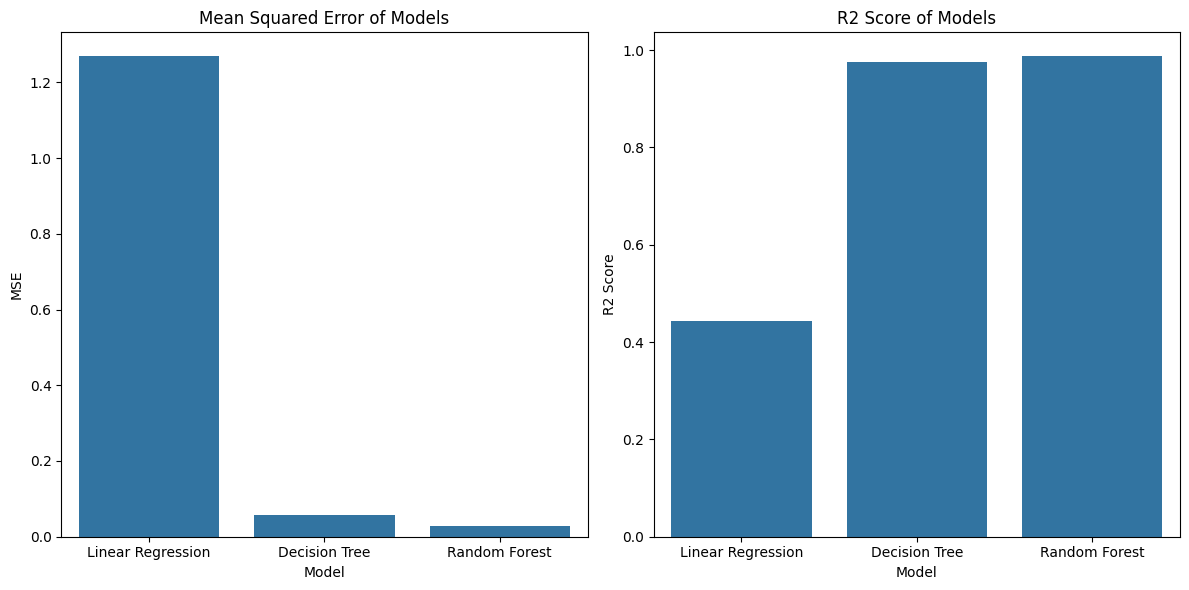

In [ ]:
# Visualize the performance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Mean Squared Error of Models')
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2 Score', data=results_df)
plt.title('R2 Score of Models')
plt.tight_layout()
plt.show()


In [ ]:
#TASK-2

In [ ]:
# Check the data types in the 'Cuisines' column
data['Cuisines'].apply(type).value_counts()


Cuisines
<class 'int'>    9551
Name: count, dtype: int64

In [ ]:
# Remove or convert any non-string values in 'Cuisines' column
data['Cuisines'] = data['Cuisines'].astype(str)

# Continue with the analysis
# Group by 'Cuisines' and calculate the mean rating and number of votes
cuisine_rating_votes = data.groupby('Cuisines').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).reset_index().rename(columns={'Aggregate rating': 'Average Rating'})

# Sort by the number of votes to identify the most popular cuisines
most_popular_cuisines = cuisine_rating_votes.sort_values(by='Votes', ascending=False)

# Sort by average rating to identify cuisines that tend to receive higher ratings
highest_rated_cuisines = cuisine_rating_votes.sort_values(by='Average Rating', ascending=False)

most_popular_cuisines.head(10), highest_rated_cuisines.head(10)



(     Cuisines  Average Rating  Votes
 574      1514        2.888623  53747
 343      1306        1.672329  46241
 368      1329        2.421722  42012
 1085      331        2.890970  30657
 1268      497        2.042090  21925
 581      1520        2.568528  20115
 1636      828        2.118362  17852
 778      1699        2.370536  16433
 322      1288        2.091667  15275
 38       1031        3.657407  14799,
      Cuisines  Average Rating  Votes
 916      1822             4.9     95
 1770      949             4.9   1343
 768       169             4.9    249
 1127       37             4.9    548
 1083       33             4.9    162
 1614      808             4.9   1413
 1609      803             4.9    441
 1600      796             4.9    621
 1172       41             4.9    570
 867      1779             4.9   5514)

In [ ]:
#TASK-3

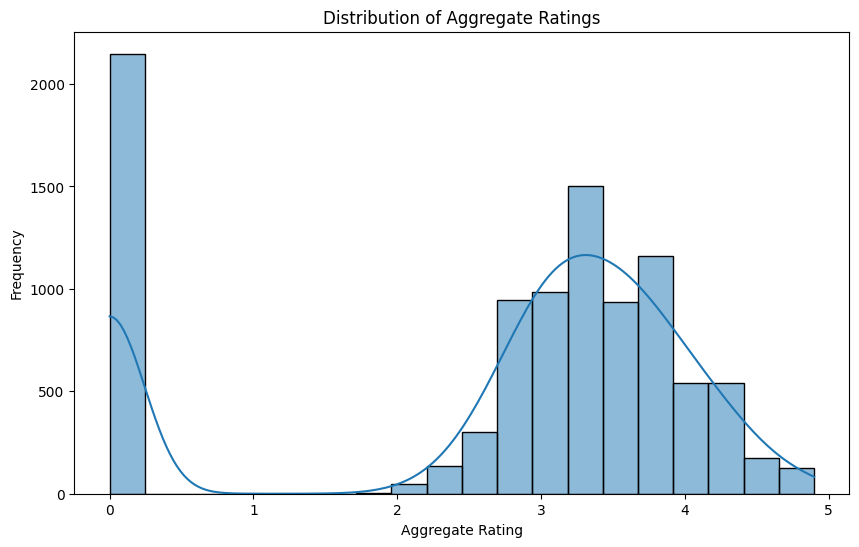

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()


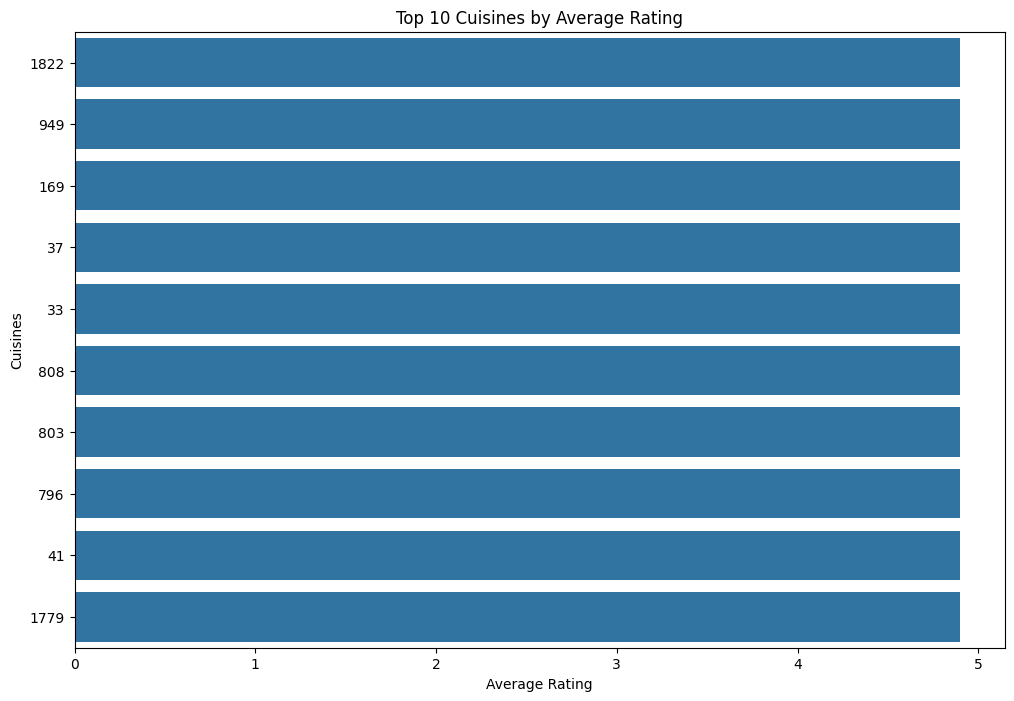

In [ ]:
# Calculate the average rating by cuisine
avg_rating_by_cuisine = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_by_cuisine.values, y=avg_rating_by_cuisine.index)
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisines')
plt.show()


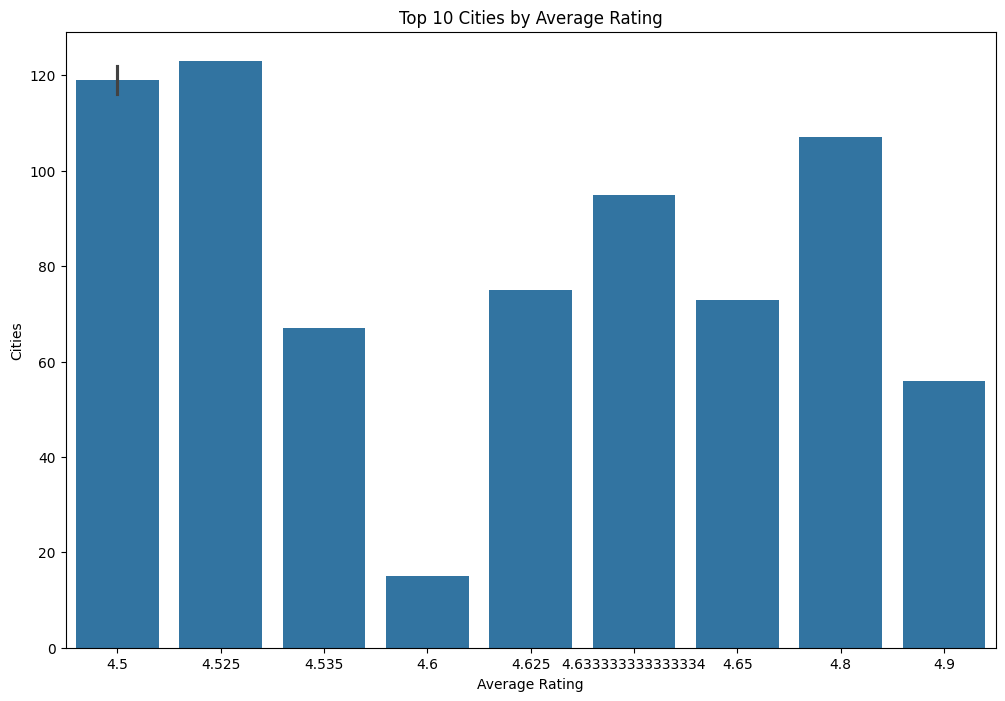

In [ ]:
# Calculate the average rating by city
avg_rating_by_city = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating_by_city.values, y=avg_rating_by_city.index)
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cities')
plt.show()


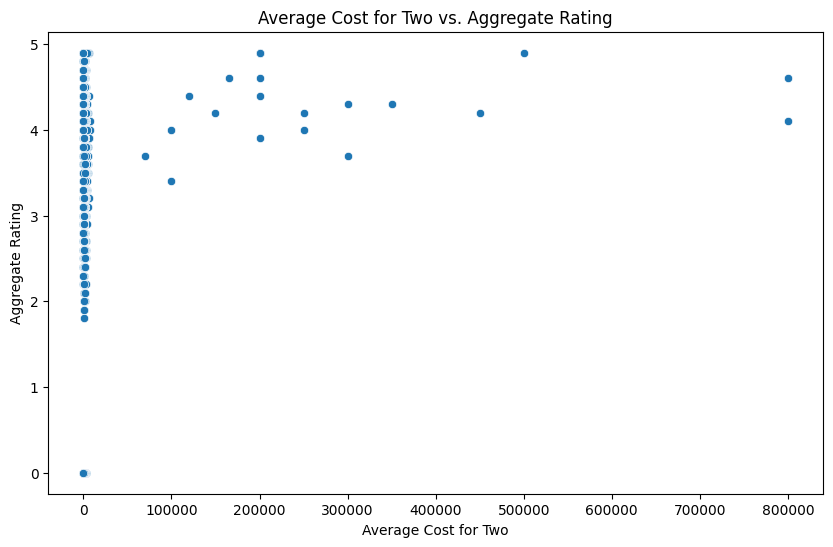

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Average Cost for two'], y=data['Aggregate rating'])
plt.title('Average Cost for Two vs. Aggregate Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.show()


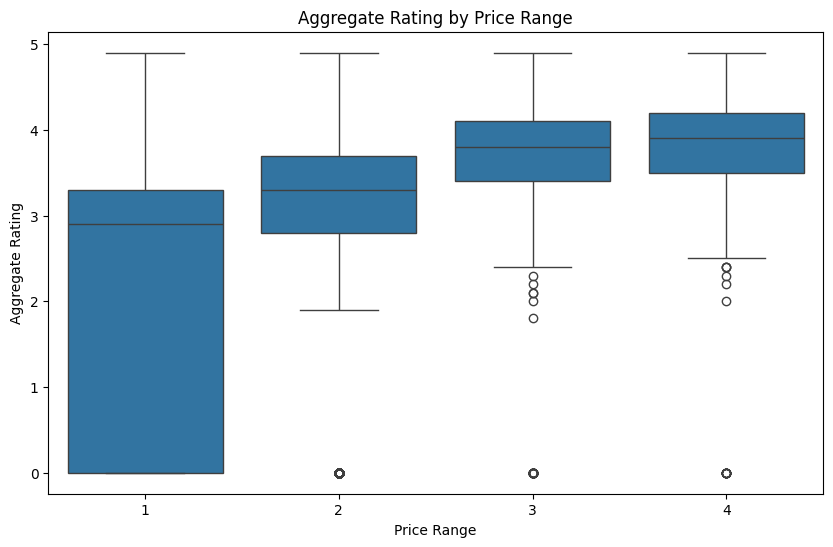

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price range'], y=data['Aggregate rating'])
plt.title('Aggregate Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()
